# 顯示資料
---

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# 銀行的檔案
trainFile = open("./Data/bank-full.csv","r") 

# 吐掉第一行
trainFile.readline()


# 資料
trainOrgDataArray = []
for line in trainFile:
    lineData = line.split(";")
    
    tempArray = []
    for data in lineData:
        tempArray.append(data.replace("\n",""))
    trainOrgDataArray.append(tempArray)

trainFile.close()

## 資料愈處理的函數
---

In [3]:
def job(x):
    return {
        "\"admin.\"": 1,
        "\"unknown\"": 2,
        "\"unemployed\"": 3,
        "\"management\"": 4,
        "\"housemaid\"": 5,
        "\"entrepreneur\"": 6,
        "\"student\"": 7,
        "\"blue-collar\"": 8,
        "\"self-employed\"": 9,
        "\"retired\"": 10,
        "\"technician\"": 11,
        "\"services\"": 12
    }.get(x, 1)    # 1 is default if x not found

In [4]:
def marital(x):
    return {
        "\"married.\"": 1,
        "\"divorced\"": 2,
        "\"single\"": 3
    }.get(x, 1)    # 1 is default if x not found

In [5]:
def education(x):
    return {
        "\"unknown\"": 1,
        "\"secondary\"": 2,
        "\"primary\"": 3,
        "\"tertiary\"": 4
    }.get(x, 1)    # 1 is default if x not found

In [6]:
def default(x):
    return {
        "\"yes\"": 1,
        "\"no\"": 2
    }.get(x, 1)    # 1 is default if x not found

In [7]:
def housing(x):
    return {
        "\"yes\"": 1,
        "\"no\"": 2
    }.get(x, 1)    # 1 is default if x not found

In [8]:
def loan(x):
    return {
        "\"yes\"": 1,
        "\"no\"": 2
    }.get(x, 1)    # 1 is default if x not found

In [9]:
def contact(x):
    return {
        "\"unknown\"": 1,
        "\"telephone\"": 2,
        "\"cellular\"": 3
    }.get(x, 1)    # 1 is default if x not found

In [10]:
def month(x):
    return {
        "\"jan\"": 1,
        "\"feb\"": 2,
        "\"mar\"": 3,
        "\"apr\"": 4,
        "\"may\"": 5,
        "\"jun\"": 6,
        "\"jul\"": 7,
        "\"aug\"": 8,
        "\"sep\"": 9,
        "\"oct\"": 10,
        "\"nov\"": 11,
        "\"dec\"": 12
    }.get(x, 1)    # 1 is default if x not found

In [11]:
def poutcome(x):
    return {
        "\"unknown\"": 1,
        "\"other\"": 2,
        "\"failure\"": 3,
        "\"success\"": 4
    }.get(x, 1)    # 1 is default if x not found

In [12]:
def termDeposit(x):
    return {
        "\"yes\"": 0,
        "\"no\"": 1
    }.get(x, 1)    # 1 is default if x not found

## 轉乘資料形式
---

In [13]:
# 將某一筆資料，全部轉乘 Training 的資料形式
def TransformDataToTraining(DataList):
    OutputArray = []
    
    OutputArray.append(int(DataList[0]))
    OutputArray.append(job(DataList[1]))
    OutputArray.append(marital(DataList[2]))
    OutputArray.append(education(DataList[3]))
    OutputArray.append(default(DataList[4]))
    OutputArray.append(int(DataList[5]))
    OutputArray.append(housing(DataList[6]))
    OutputArray.append(loan(DataList[7]))
    OutputArray.append(contact(DataList[8]))
    OutputArray.append(int(DataList[9]))
    OutputArray.append(month(DataList[10]))
    OutputArray.append(int(DataList[11]))
    OutputArray.append(int(DataList[12]))
    OutputArray.append(int(DataList[13]))
    OutputArray.append(int(DataList[14]))
    OutputArray.append(poutcome(DataList[15]))
    
    Ans = termDeposit(DataList[16])
    return OutputArray, Ans

In [14]:
# 要找出最小跟最大的陣列
def FindMinAndMax(DataList):
    OutputArray = []
    
    # 先把每一個的值拿進來
    for i in range(0, len(DataList[0])):
        # 產生暫存的 Array
        tempArray = []
        
        for dataNum in range(0, len(DataList)):
            tempArray.append(DataList[dataNum][i])
        OutputArray.append([min(tempArray), max(tempArray)])
    return OutputArray

In [15]:
# Feature 資料
FeatureDataList = []

# Ans
AnsDataList = []

# Yes & No Index Array
YesArray = []
NoArray = []

for i in range(0, len(trainOrgDataArray)):
    FeatureData, AnsData = TransformDataToTraining(trainOrgDataArray[i])
    FeatureDataList.append(FeatureData)
    AnsDataList.append(AnsData)
    
    # 把 Yes 跟 No 分開
    if AnsData == 0:
        YesArray.append(i)
    else:
        NoArray.append(i)

# 找出最大最小值，在畫表格的時候會用到
MinMaxArrayList = FindMinAndMax(FeatureDataList)

In [16]:
print("Yes 總共有 ", format(len(YesArray)))
print("No  總共有 ", format(len(NoArray)))

# 洗亂，取前面 % 的資料畫圖
pickRatio = 0.1
yesPickAmount = int(len(YesArray) * pickRatio)
noPickAmount = int(len(NoArray) * pickRatio)
print("Yes Pick: ", format(yesPickAmount))
print("No  Pick:", format(noPickAmount))
random.shuffle(YesArray)
random.shuffle(NoArray)

Yes 總共有  5289
No  總共有  39922
Yes Pick:  528
No  Pick: 3992


## Plot 出來
---

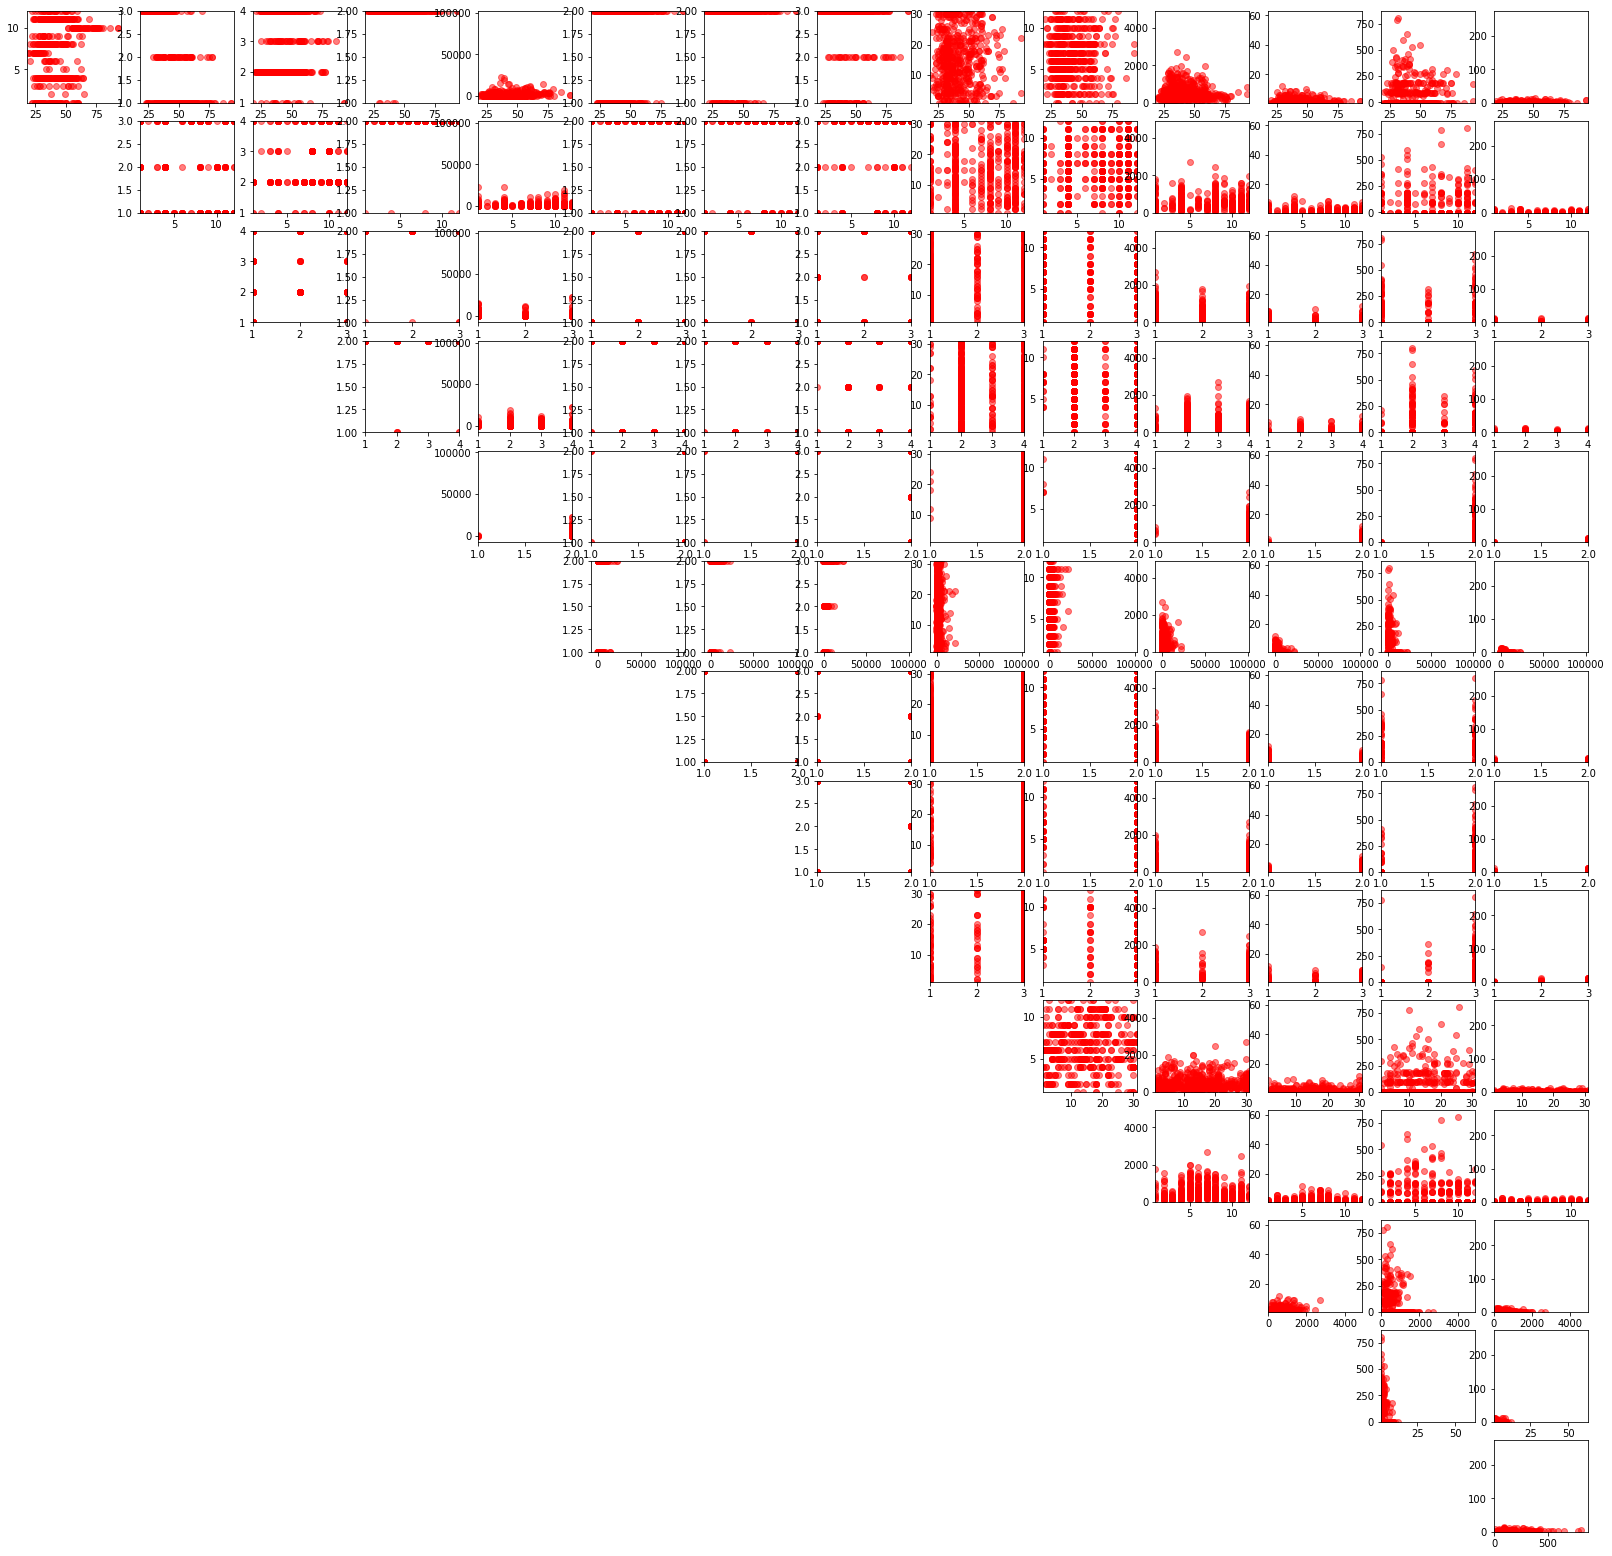

In [17]:
fig, axes = plt.subplots(15, 15, figsize=(30,30))
for rowIndex in range(0, 15):
    for colIndex in range(0, 15):
        if(colIndex > rowIndex):
            for index in range(0, yesPickAmount):
                # 只有定期存款的部分
                axes[rowIndex, colIndex].scatter(
                    FeatureDataList[YesArray[index]][rowIndex],
                    FeatureDataList[YesArray[index]][colIndex],
                    c = 'red',
                    alpha = 0.5
                )
                    
                # 要根據全部的資料的最大最小值去 Scale
                axes[rowIndex, colIndex].set_xlim(MinMaxArrayList[rowIndex])
                axes[rowIndex, colIndex].set_ylim(MinMaxArrayList[colIndex])
        else:
            fig.delaxes(axes[rowIndex, colIndex])

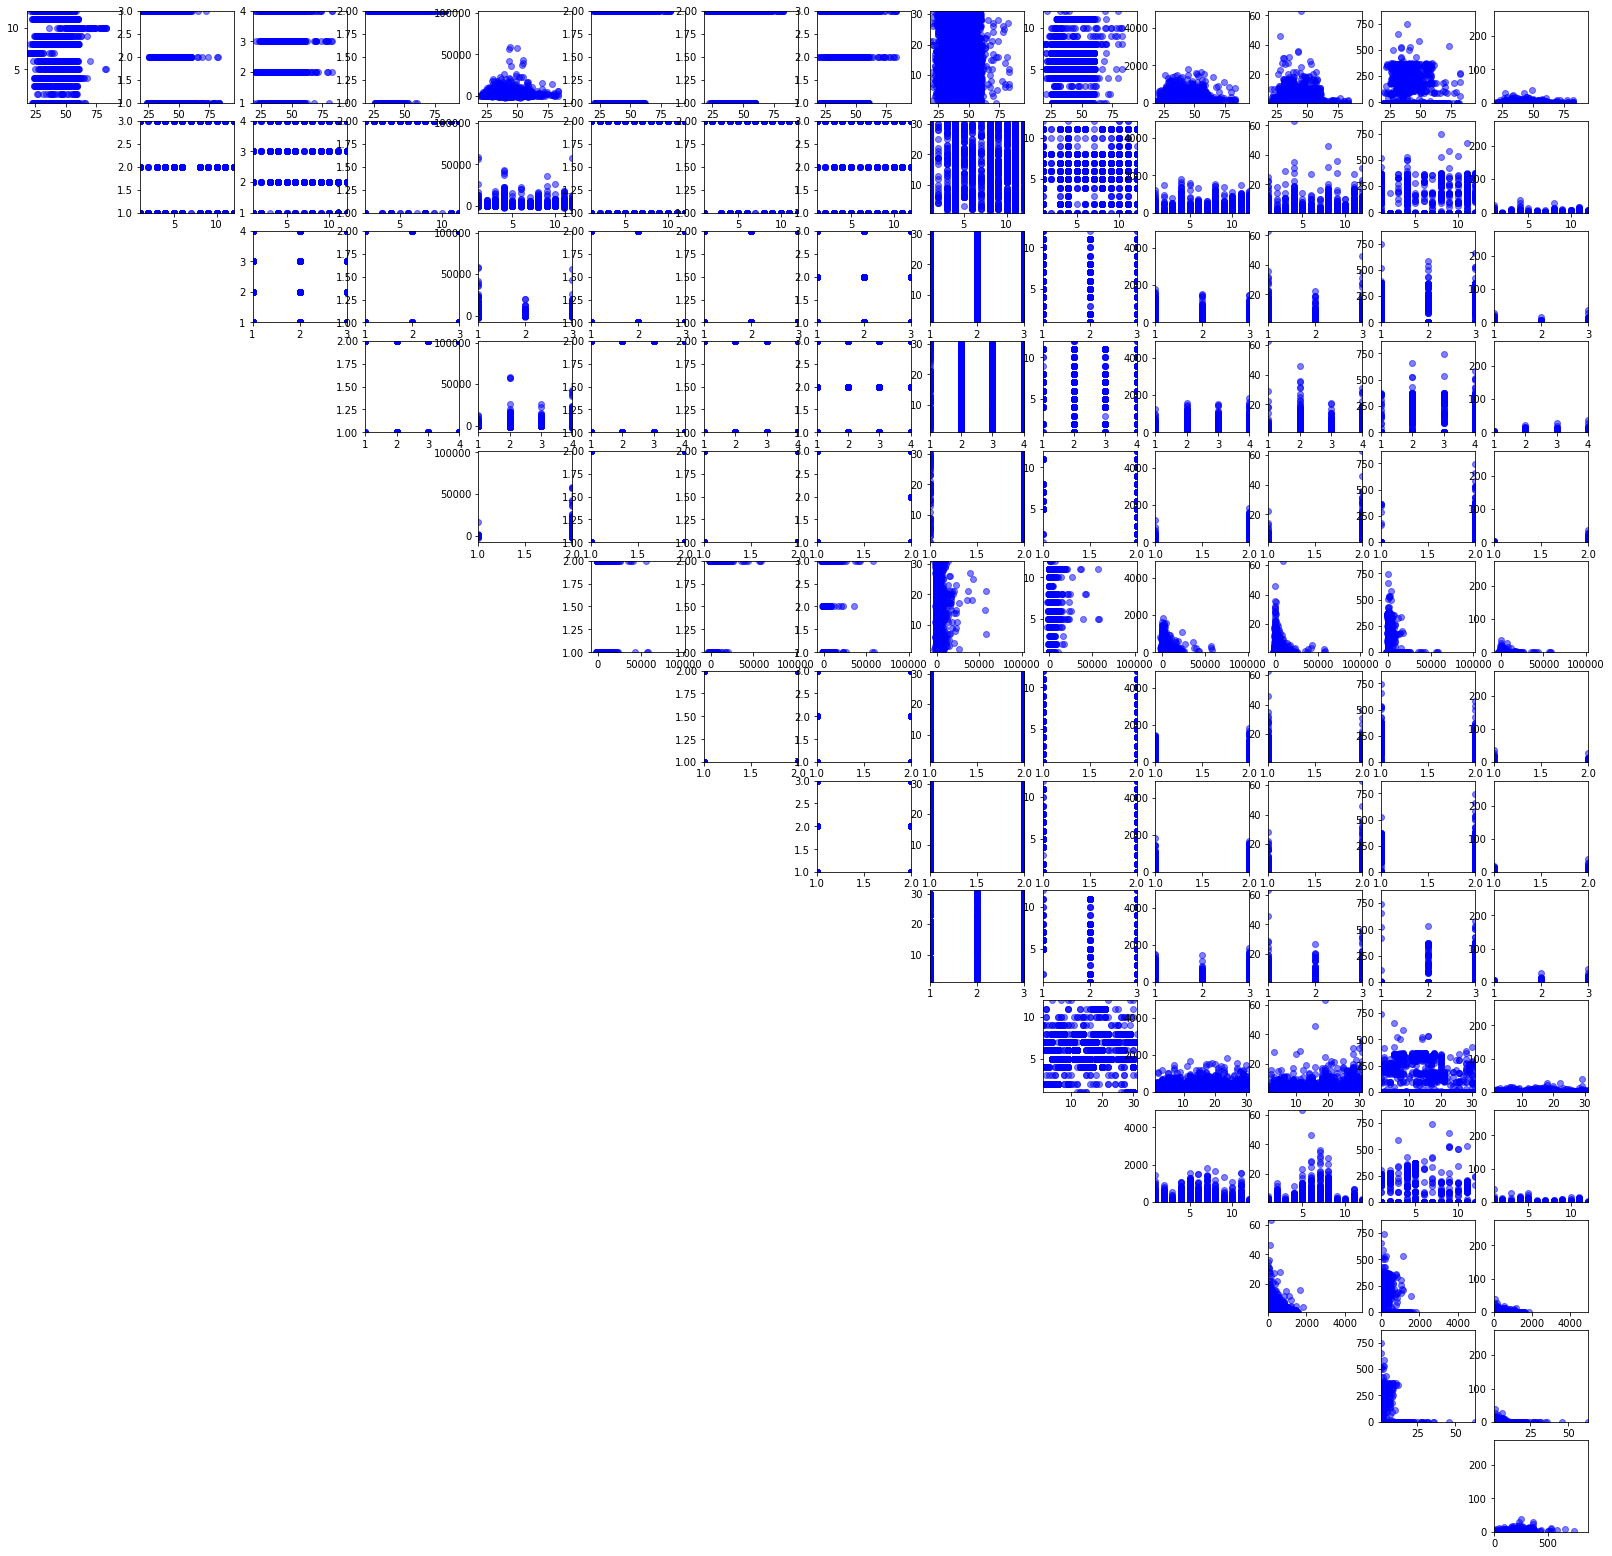

In [18]:
fig, axes = plt.subplots(15, 15, figsize=(30,30))
for rowIndex in range(0, 15):
    for colIndex in range(0, 15):
        if(colIndex > rowIndex):
            for index in range(0, noPickAmount):
                # 只沒有定期存款的部分
                axes[rowIndex, colIndex].scatter(
                    FeatureDataList[NoArray[index]][rowIndex],
                    FeatureDataList[NoArray[index]][colIndex],
                    c = 'blue',
                    alpha = 0.5
                )
                
                # 要根據全部的資料的最大最小值去 Scale
                axes[rowIndex, colIndex].set_xlim(MinMaxArrayList[rowIndex])
                axes[rowIndex, colIndex].set_ylim(MinMaxArrayList[colIndex])
        else:
            fig.delaxes(axes[rowIndex, colIndex])